In [1]:
#import necessary packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import os
import pydotplus
import collections
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend
tf.random.set_seed(1234)

In [2]:
mentalhealth = pd.read_csv("C:\\Users\\ashle\\MSDS696\\Mental Health.csv")
mentalhealth.head()

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,Adults with AMI Reporting Unmet Need,Mental Health Workforce Availability
0,Minnesota,1,4,1,32,3,18.24,4.15,13.39,41.5,22.3,26
1,Maine,2,1,9,29,4,17.62,3.74,14.25,43.0,17.3,3
2,Massachusetts,3,7,4,39,1,19.34,3.97,13.72,48.6,18.8,1
3,New Jersey,4,5,7,1,27,15.50,3.58,10.39,57.0,19.7,31
4,Vermont,5,23,2,45,2,20.85,5.48,12.45,45.5,18.8,5


In [3]:
mentalhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    51 non-null     object 
 1   Overall Rank                             51 non-null     int64  
 2   Adult Rankings                           51 non-null     int64  
 3   Youth Rankings                           51 non-null     int64  
 4   Prevalence of Mental Illness             51 non-null     int64  
 5   Access to Care Rankings                  51 non-null     int64  
 6   Adult Prevalence of Mental Illness       51 non-null     float64
 7   Adults with Serious Thoughts of Suicide  51 non-null     float64
 8   Youth Prevalence of Mental Illness       51 non-null     float64
 9   Adult Access to Care                     51 non-null     float64
 10  Adults with AMI Reporting Unmet Need     51 non-null

In [4]:
mentalhealth.describe()

,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,Adults with AMI Reporting Unmet Need,Mental Health Workforce Availability
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,26.000000,26.000000,26.000000,26.000000,18.725882,4.259804,12.857255,54.845098,20.884314,26.000000
std,14.866069,14.866069,14.866069,14.866069,14.866069,1.694157,0.537168,1.499475,5.318921,2.525579,14.866069
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.500000,3.340000,9.910000,41.500000,15.800000,1.000000
25%,13.500000,13.500000,13.500000,13.500000,13.500000,17.580000,3.855000,11.850000,52.600000,19.400000,13.500000
50%,26.000000,26.000000,26.000000,26.000000,26.000000,18.470000,4.220000,12.840000,55.400000,20.800000,26.000000
75%,38.500000,38.500000,38.500000,38.500000,38.500000,19.835000,4.520000,13.855000,57.650000,22.100000,38.500000
max,51.000000,51.000000,51.000000,51.000000,51.000000,22.610000,5.620000,15.930000,67.500000,26.300000,51.000000


In [5]:
populations = pd.read_csv("C:\\Users\\ashle\\MSDS696\\Populations.csv")
populations.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
0,10,0,0,0,United States,328239523,255200373,77.7,562184,0.17
1,40,3,6,1,Alabama,4903185,3814879,77.8,3261,0.07
2,40,4,9,2,Alaska,731545,551562,75.4,1907,0.26
3,40,4,8,4,Arizona,7278717,5638481,77.5,10007,0.14
4,40,3,7,5,Arkansas,3017804,2317649,76.8,2717,0.09


In [6]:
populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SUMLEV              52 non-null     int64  
 1   REGION              52 non-null     int64  
 2   DIVISION            52 non-null     int64  
 3   STATE               52 non-null     int64  
 4   NAME                52 non-null     object 
 5   POPESTIMATE2019     52 non-null     int64  
 6   POPEST18PLUS2019    52 non-null     int64  
 7   PCNT_POPEST18PLUS   52 non-null     float64
 8   POPEXPHOMELESSNESS  52 non-null     int64  
 9   PCT_POPEXPHOMELESS  52 non-null     float64
dtypes: float64(2), int64(7), object(1)
memory usage: 4.2+ KB


In [7]:
populations.describe()

,SUMLEV,REGION,DIVISION,STATE,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
count,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000
mean,39.423077,2.615385,5.019231,28.403846,1.262460e+07,9.815399e+06,77.857692,21622.461538,0.154615
std,4.160251,1.105314,2.608360,16.183094,4.521733e+07,3.515154e+07,1.977258,80088.867885,0.145312
min,10.000000,0.000000,0.000000,0.000000,5.787590e+05,4.450250e+05,71.000000,548.000000,0.040000
25%,40.000000,2.000000,3.000000,15.750000,1.790876e+06,1.409151e+06,76.775000,2315.000000,0.090000
50%,40.000000,3.000000,5.000000,28.500000,4.558234e+06,3.512983e+06,77.850000,5004.500000,0.100000
75%,40.000000,3.250000,7.250000,41.250000,7.845050e+06,6.132542e+06,78.875000,9716.000000,0.152500
max,40.000000,4.000000,9.000000,56.000000,3.282395e+08,2.552004e+08,81.800000,562184.000000,0.920000


In [8]:
pop1 = populations.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE'], axis = 1)
pop1

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
0,United States,328239523,255200373,77.7,562184,0.17
1,Alabama,4903185,3814879,77.8,3261,0.07
2,Alaska,731545,551562,75.4,1907,0.26
3,Arizona,7278717,5638481,77.5,10007,0.14
4,Arkansas,3017804,2317649,76.8,2717,0.09
5,California,39512223,30617582,77.5,151278,0.38
6,Colorado,5758736,4499217,78.1,9619,0.17
7,Connecticut,3565287,2837847,79.6,3033,0.09
8,Delaware,973764,770192,79.1,921,0.09
9,District of Columbia,705749,577581,81.8,6521,0.92


In [9]:
pop2 = pop1.drop(index = 0)
pop2.head()

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
1,Alabama,4903185,3814879,77.8,3261,0.07
2,Alaska,731545,551562,75.4,1907,0.26
3,Arizona,7278717,5638481,77.5,10007,0.14
4,Arkansas,3017804,2317649,76.8,2717,0.09
5,California,39512223,30617582,77.5,151278,0.38


In [10]:
mentalhealth.sort_values(by='State', inplace = True)

In [11]:
mentalhealth

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,Adults with AMI Reporting Unmet Need,Mental Health Workforce Availability
35,Alabama,36,17,35,5,48,18.47,3.57,11.18,58.8,16.6,51
46,Alaska,47,49,47,50,19,20.01,5.15,15.22,61.8,18.3,9
38,Arizona,39,30,43,25,42,17.52,4.01,11.68,62.6,21.3,47
36,Arkansas,37,40,39,30,41,21.02,4.47,13.05,56.6,22.7,27
24,California,25,22,34,23,31,17.15,3.96,12.93,62.3,19.9,11
28,Colorado,29,32,33,48,10,20.05,4.88,14.59,53.5,21.8,12
5,Connecticut,6,15,5,27,7,18.00,3.76,12.52,53.6,20.8,10
15,Delaware,16,14,16,18,20,17.71,4.35,11.94,47.8,20.8,21
21,District of Columbia,22,39,17,33,23,18.82,4.22,9.91,58.2,26.3,2
31,Florida,32,26,32,9,43,17.30,3.34,12.84,61.4,18.5,42


In [12]:
mentalhealth.reset_index(inplace = True, drop =True)

In [13]:
pop2.reset_index(inplace = True, drop = True)

In [14]:
dataframe = pd.concat([mentalhealth, pop2], axis = 1)

In [15]:
dataframe

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,Adults with AMI Reporting Unmet Need,Mental Health Workforce Availability,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
0,Alabama,36,17,35,5,48,18.47,3.57,11.18,58.8,16.6,51,Alabama,4903185,3814879,77.8,3261,0.07
1,Alaska,47,49,47,50,19,20.01,5.15,15.22,61.8,18.3,9,Alaska,731545,551562,75.4,1907,0.26
2,Arizona,39,30,43,25,42,17.52,4.01,11.68,62.6,21.3,47,Arizona,7278717,5638481,77.5,10007,0.14
3,Arkansas,37,40,39,30,41,21.02,4.47,13.05,56.6,22.7,27,Arkansas,3017804,2317649,76.8,2717,0.09
4,California,25,22,34,23,31,17.15,3.96,12.93,62.3,19.9,11,California,39512223,30617582,77.5,151278,0.38
5,Colorado,29,32,33,48,10,20.05,4.88,14.59,53.5,21.8,12,Colorado,5758736,4499217,78.1,9619,0.17
6,Connecticut,6,15,5,27,7,18.00,3.76,12.52,53.6,20.8,10,Connecticut,3565287,2837847,79.6,3033,0.09
7,Delaware,16,14,16,18,20,17.71,4.35,11.94,47.8,20.8,21,Delaware,973764,770192,79.1,921,0.09
8,District of Columbia,22,39,17,33,23,18.82,4.22,9.91,58.2,26.3,2,District of Columbia,705749,577581,81.8,6521,0.92
9,Florida,32,26,32,9,43,17.30,3.34,12.84,61.4,18.5,42,Florida,21477737,17247808,80.3,28328,0.13


In [16]:
dataframe.drop(['NAME'], axis = 1, inplace = True)

In [17]:
dataframe.head()

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,Adults with AMI Reporting Unmet Need,Mental Health Workforce Availability,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS
0,Alabama,36,17,35,5,48,18.47,3.57,11.18,58.8,16.6,51,4903185,3814879,77.8,3261,0.07
1,Alaska,47,49,47,50,19,20.01,5.15,15.22,61.8,18.3,9,731545,551562,75.4,1907,0.26
2,Arizona,39,30,43,25,42,17.52,4.01,11.68,62.6,21.3,47,7278717,5638481,77.5,10007,0.14
3,Arkansas,37,40,39,30,41,21.02,4.47,13.05,56.6,22.7,27,3017804,2317649,76.8,2717,0.09
4,California,25,22,34,23,31,17.15,3.96,12.93,62.3,19.9,11,39512223,30617582,77.5,151278,0.38


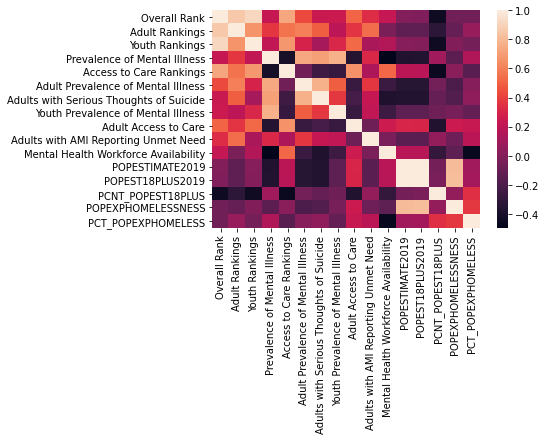

In [18]:
_ = sns.heatmap(dataframe.corr())

In [19]:
druguse = pd.read_csv("C:\\Users\\ashle\\MSDS696\\druguse.csv")
druguse

,State,12+,18-25,26+,18+
0,Alabama,0.1066,0.1751,0.1011,0.1110
1,Alaska,0.1868,0.3009,0.1829,0.1986
2,Arizona,0.1403,0.2437,0.1326,0.1479
3,Arkansas,0.1185,0.2169,0.1087,0.1235
4,California,0.1628,0.2777,0.1523,0.1693
5,Colorado,0.1932,0.3147,0.1860,0.2031
6,Connecticut,0.1521,0.3366,0.1278,0.1561
7,Delaware,0.1220,0.2412,0.1113,0.1270
8,District of Columbia,0.2051,0.3071,0.1941,0.2109
9,Florida,0.1274,0.2398,0.1186,0.1325


In [20]:
druguse.drop('State', axis = 1, inplace = True)

In [21]:
druguse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   12+     51 non-null     float64
 1   18-25   51 non-null     float64
 2   26+     51 non-null     float64
 3   18+     51 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [22]:
df1 = pd.concat([dataframe, druguse], axis = 1)

In [23]:
df1.head()

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,...,Mental Health Workforce Availability,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,POPEXPHOMELESSNESS,PCT_POPEXPHOMELESS,12+,18-25,26+,18+
0,Alabama,36,17,35,5,48,18.47,3.57,11.18,58.8,...,51,4903185,3814879,77.8,3261,0.07,0.1066,0.1751,0.1011,0.1110
1,Alaska,47,49,47,50,19,20.01,5.15,15.22,61.8,...,9,731545,551562,75.4,1907,0.26,0.1868,0.3009,0.1829,0.1986
2,Arizona,39,30,43,25,42,17.52,4.01,11.68,62.6,...,47,7278717,5638481,77.5,10007,0.14,0.1403,0.2437,0.1326,0.1479
3,Arkansas,37,40,39,30,41,21.02,4.47,13.05,56.6,...,27,3017804,2317649,76.8,2717,0.09,0.1185,0.2169,0.1087,0.1235
4,California,25,22,34,23,31,17.15,3.96,12.93,62.3,...,11,39512223,30617582,77.5,151278,0.38,0.1628,0.2777,0.1523,0.1693


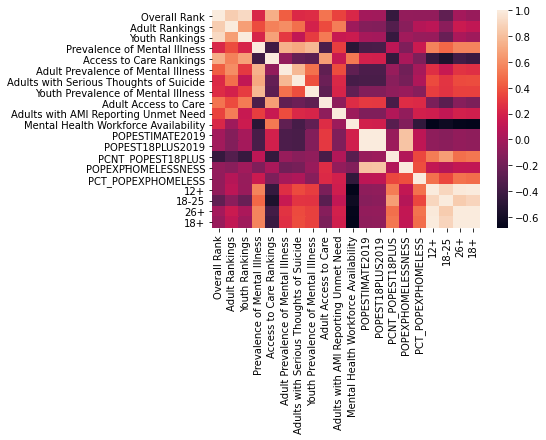

In [24]:
_ = sns.heatmap(df1.corr())

In [25]:
beds = pd.read_csv("C:\\Users\\ashle\\MSDS696\\Beds.csv")
beds.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)","Dedicated Veteran Beds (ES, TH, SH)","Dedicated Youth Beds (ES, TH, SH)"
0,AL,2701.0,2204.0,1534.0,0.5679,1937.0,730.0,34.0,319.0,982.0,1669.0,50.0,158.0,138.0
1,AK,1878.0,1486.0,1333.0,0.7098,1374.0,504.0,0.0,211.0,677.0,1169.0,32.0,15.0,160.0
2,AZ,6568.0,5277.0,4649.0,0.7078,3787.0,2713.0,68.0,888.0,3112.0,3410.0,46.0,623.0,197.0
3,AR,1917.0,1324.0,689.0,0.3594,1497.0,420.0,0.0,242.0,808.0,1085.0,24.0,106.0,78.0
4,CA,46306.0,41794.0,30687.0,0.6627,31028.0,14969.0,309.0,6435.0,20804.0,25257.0,245.0,3123.0,2562.0


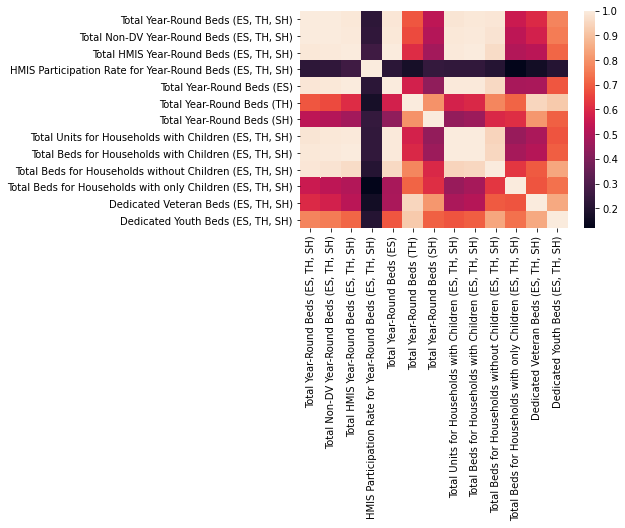

In [26]:
_ = sns.heatmap(beds.corr())

In [27]:
beds.drop('State', axis = 1, inplace = True)

In [28]:
df2 = pd.concat([df1, beds], axis = 1)
df2

,State,Overall Rank,Adult Rankings,Youth Rankings,Prevalence of Mental Illness,Access to Care Rankings,Adult Prevalence of Mental Illness,Adults with Serious Thoughts of Suicide,Youth Prevalence of Mental Illness,Adult Access to Care,...,"HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)","Dedicated Veteran Beds (ES, TH, SH)","Dedicated Youth Beds (ES, TH, SH)"
0,Alabama,36.0,17.0,35.0,5.0,48.0,18.47,3.57,11.18,58.8,...,0.5679,1937.0,730.0,34.0,319.0,982.0,1669.0,50.0,158.0,138.0
1,Alaska,47.0,49.0,47.0,50.0,19.0,20.01,5.15,15.22,61.8,...,0.7098,1374.0,504.0,0.0,211.0,677.0,1169.0,32.0,15.0,160.0
2,Arizona,39.0,30.0,43.0,25.0,42.0,17.52,4.01,11.68,62.6,...,0.7078,3787.0,2713.0,68.0,888.0,3112.0,3410.0,46.0,623.0,197.0
3,Arkansas,37.0,40.0,39.0,30.0,41.0,21.02,4.47,13.05,56.6,...,0.3594,1497.0,420.0,0.0,242.0,808.0,1085.0,24.0,106.0,78.0
4,California,25.0,22.0,34.0,23.0,31.0,17.15,3.96,12.93,62.3,...,0.6627,31028.0,14969.0,309.0,6435.0,20804.0,25257.0,245.0,3123.0,2562.0
5,Colorado,29.0,32.0,33.0,48.0,10.0,20.05,4.88,14.59,53.5,...,0.4591,4796.0,3337.0,63.0,1451.0,3227.0,4945.0,24.0,394.0,182.0
6,Connecticut,6.0,15.0,5.0,27.0,7.0,18.00,3.76,12.52,53.6,...,0.8513,2147.0,545.0,5.0,354.0,1144.0,1537.0,16.0,184.0,129.0
7,Delaware,16.0,14.0,16.0,18.0,20.0,17.71,4.35,11.94,47.8,...,0.4793,577.0,437.0,0.0,198.0,452.0,558.0,4.0,58.0,15.0
8,District of Columbia,22.0,39.0,17.0,33.0,23.0,18.82,4.22,9.91,58.2,...,0.8871,4651.0,1505.0,0.0,892.0,2872.0,3269.0,15.0,169.0,561.0
9,Florida,32.0,26.0,32.0,9.0,43.0,17.30,3.34,12.84,61.4,...,0.7381,11595.0,6805.0,217.0,1945.0,7267.0,10936.0,414.0,1321.0,907.0


In [29]:
df2.drop(index=51, inplace = True)

In [30]:
df2.drop('POPEXPHOMELESSNESS', axis = 1, inplace = True)

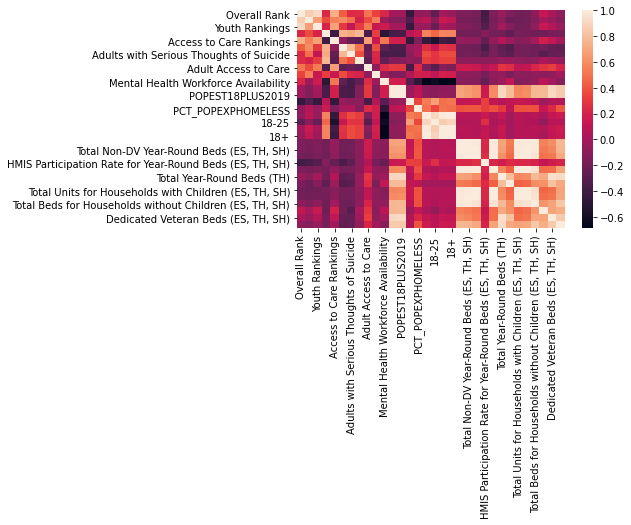

In [31]:
_ = sns.heatmap(df2.corr())

In [32]:
df3 = df2.drop('State', axis = 1)

In [33]:
#set up target and feature columns
cols = df3.columns
target = 'PCT_POPEXPHOMELESS'
feat = [c for c in cols if c != target]

X = df3[feat].values
y = df3[target].values

In [34]:
#setting up the training and testing set with an 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [35]:
#setting the model up with 7 groups initially
model = KNeighborsRegressor(n_neighbors=7, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=7)

In [36]:
KNN_preds = model.predict(X_test)

print('Actuals')
print(y_test)
print('Predictions')
print(KNN_preds)
print('Difference between actual and predictions')
print(y_test - KNN_preds)

Actuals
[0.08 0.11 0.28 0.09 0.09 0.13 0.12 0.14 0.23 0.1  0.45 0.07 0.07 0.06
 0.09 0.08]
Predictions
[0.13857143 0.17857143 0.13857143 0.13       0.13       0.14571429
 0.12       0.17857143 0.13       0.13142857 0.11428571 0.12857143
 0.14142857 0.14142857 0.13285714 0.17285714]
Difference between actual and predictions
[-0.05857143 -0.06857143  0.14142857 -0.04       -0.04       -0.01571429
  0.         -0.03857143  0.1        -0.03142857  0.33571429 -0.05857143
 -0.07142857 -0.08142857 -0.04285714 -0.09285714]


In [38]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, KNN_preds), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, KNN_preds), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, KNN_preds), 2))

MSE for DTReg (All features):  0.01
MAE for DTReg (All features):  0.08
RSquared for DTReg (All features):  -0.16


In [39]:
from sklearn import tree

tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)

In [40]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, tree_preds), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, tree_preds), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, tree_preds), 2))

MSE for DTReg (All features):  0.02
MAE for DTReg (All features):  0.07
RSquared for DTReg (All features):  -0.65


In [41]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(tree_preds)

Actuals for test data set
[0.08 0.11 0.28 0.09 0.09 0.13 0.12 0.14 0.23 0.1  0.45 0.07 0.07 0.06
 0.09 0.08]
Predictions for test data set
[0.09 0.1  0.17 0.1  0.1  0.47 0.07 0.1  0.16 0.17 0.11 0.09 0.1  0.1
 0.1  0.09]


In [42]:
importance_list = list(zip(feat,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('PCNT_POPEST18PLUS', 0.6480329317118098),
 ('Total Non-DV Year-Round Beds (ES, TH, SH)', 0.19642151065826716),
 ('Prevalence of Mental Illness', 0.10064325730298357),
 ('POPESTIMATE2019', 0.01769886322103396),
 ('12+', 0.014946180036802807),
 ('Overall Rank', 0.007976823743914736),
 ('Access to Care Rankings', 0.003429942837331561),
 ('Adult Rankings', 0.0031272255742896674),
 ('18+', 0.00308839223991202),
 ('Adults with Serious Thoughts of Suicide', 0.0011195214204789002),
 ('Total HMIS Year-Round Beds (ES, TH, SH)', 0.001105607872867982),
 ('Dedicated Youth Beds (ES, TH, SH)', 0.0011056078728679062),
 ('Youth Rankings', 0.0006401616333759495),
 ('26+', 0.00034808591038743995),
 ('Adults with AMI Reporting Unmet Need', 0.00018796639160918992),
 ('HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
  7.3098041181298e-05),
 ('Total Year-Round Beds (ES)', 5.48235308860087e-05),
 ('Adult Prevalence of Mental Illness', 0.0),
 ('Youth Prevalence of Mental Illness', 0.0),
 ('Adult A

In [43]:
import pydotplus
import collections

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feat,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('homelessnessdecisiontree.png')

True

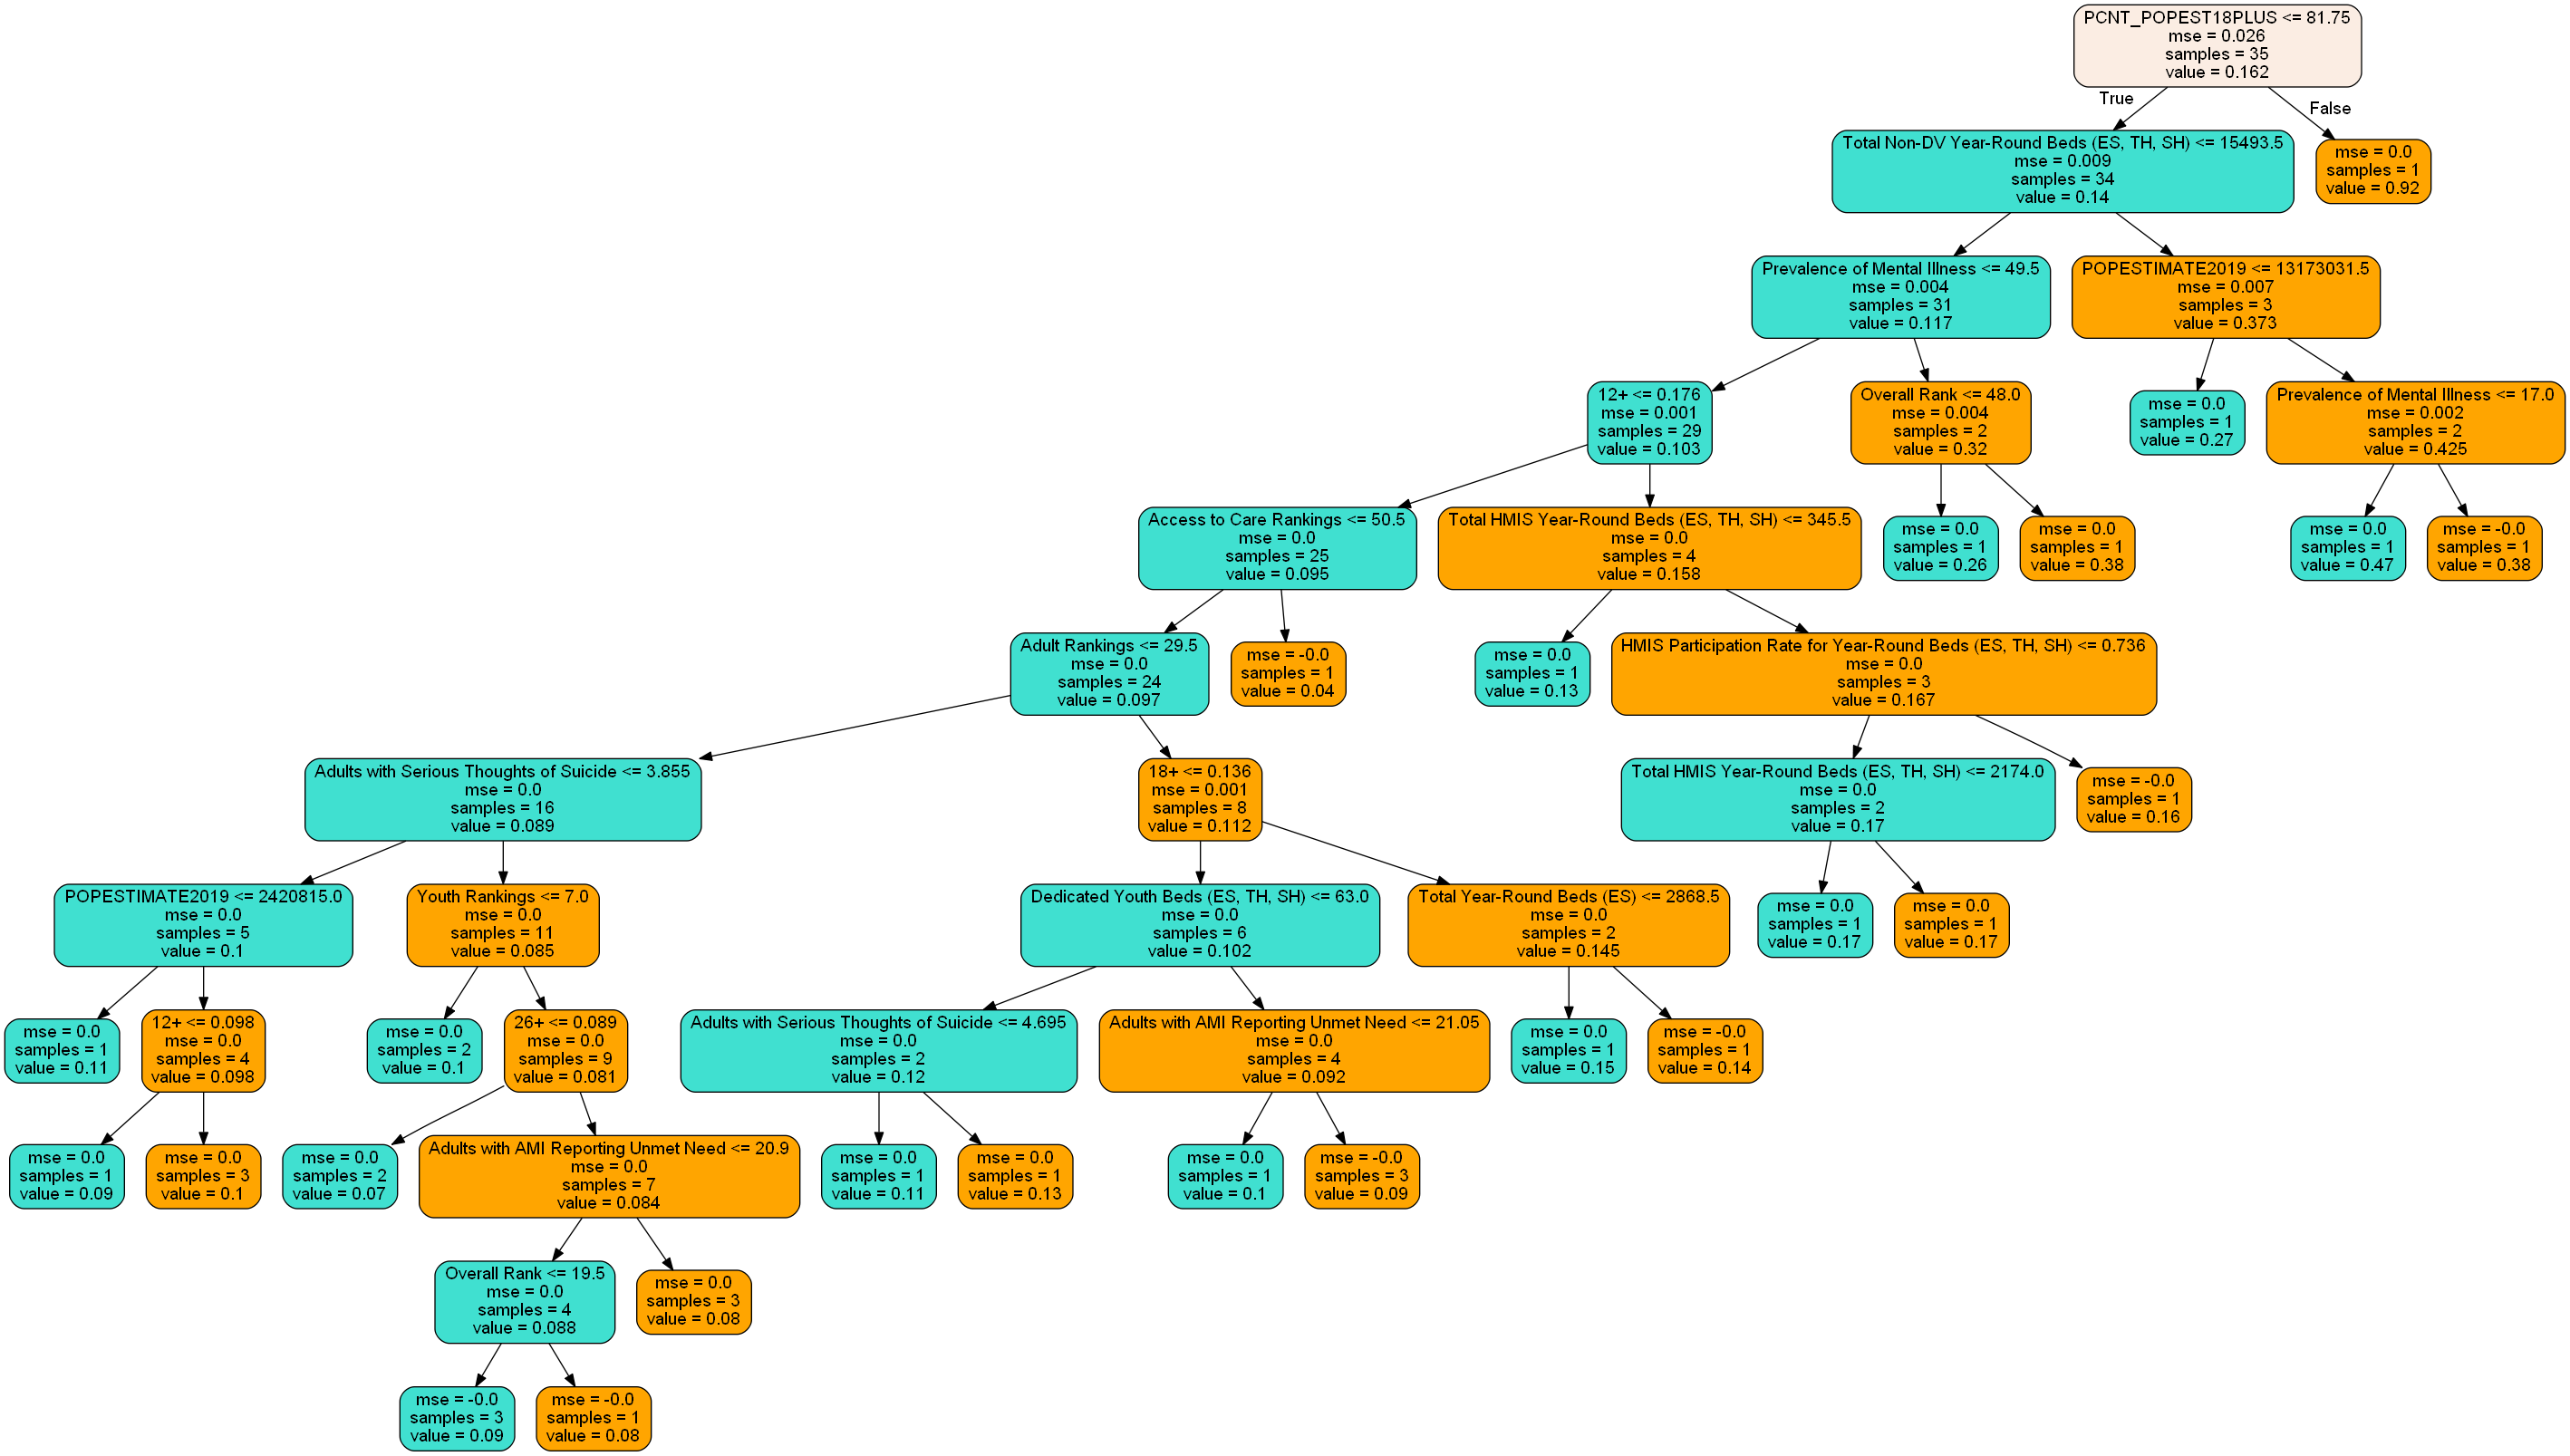

In [44]:
from IPython.display import Image

Image(filename='homelessnessdecisiontree.png') 

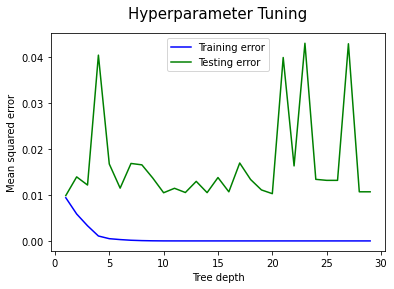

In [45]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 30)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [46]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(10, 100, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 21, 'min_samples_split': 10}
0.024160126336248783


In [49]:
from sklearn import tree

tree_model2 = tree.DecisionTreeRegressor(max_depth = 21, min_samples_split = 10)
tree_model2.fit(X_train, y_train)

tree_preds2 = tree_model.predict(X_test)

In [50]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, tree_preds2), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, tree_preds2), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, tree_preds2), 2))

MSE for DTReg (All features):  0.01
MAE for DTReg (All features):  0.07
RSquared for DTReg (All features):  -0.38


In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_jobs = 1, random_state=27)
forest_model.fit(X_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(X_test)

In [52]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, forest_preds), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, forest_preds), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, forest_preds), 2))

MSE for DTReg (All features):  0.01
MAE for DTReg (All features):  0.06
RSquared for DTReg (All features):  0.09


In [53]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[0.08 0.11 0.28 0.09 0.09 0.13 0.12 0.14 0.23 0.1  0.45 0.07 0.07 0.06
 0.09 0.08]
Predictions for test data set
[0.1099 0.0969 0.2729 0.1185 0.1811 0.1931 0.1712 0.1194 0.4063 0.1909
 0.1823 0.0934 0.0875 0.1755 0.1006 0.0952]


In [54]:
importance_list = list(zip(feat,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Adults with AMI Reporting Unmet Need', 0.11995684883916174),
 ('PCNT_POPEST18PLUS', 0.11814510343364426),
 ('Youth Prevalence of Mental Illness', 0.1031851339156448),
 ('HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
  0.08593926577167224),
 ('Dedicated Youth Beds (ES, TH, SH)', 0.06572058422021644),
 ('26+', 0.06018834427407631),
 ('18+', 0.05527526131293533),
 ('Total Year-Round Beds (ES)', 0.046928338400347526),
 ('Total Beds for Households with only Children (ES, TH, SH)',
  0.044541647322107324),
 ('Mental Health Workforce Availability', 0.03778920506470591),
 ('Total Beds for Households with Children (ES, TH, SH)', 0.03709499025216215),
 ('12+', 0.03296236218326223),
 ('Prevalence of Mental Illness', 0.03208619135681435),
 ('Total Non-DV Year-Round Beds (ES, TH, SH)', 0.026995486510628035),
 ('Dedicated Veteran Beds (ES, TH, SH)', 0.01823645962733447),
 ('Total Year-Round Beds (ES, TH, SH)', 0.0167995480364157),
 ('Total Year-Round Beds (TH)', 0.012467990663275667)

In [55]:
max_feature_len = len(max(feat, key=len))
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Adults with AMI Reporting Unmet Need: ..................... 12.00%
PCNT_POPEST18PLUS: ........................................ 11.81%
Youth Prevalence of Mental Illness: ....................... 10.32%
HMIS Participation Rate for Year-Round Beds (ES, TH, SH): . 8.59%
Dedicated Youth Beds (ES, TH, SH): ........................ 6.57%
26+: ...................................................... 6.02%
18+: ...................................................... 5.53%
Total Year-Round Beds (ES): ............................... 4.69%
Total Beds for Households with only Children (ES, TH, SH):  4.45%
Mental Health Workforce Availability: ..................... 3.78%
Total Beds for Households with Children (ES, TH, SH): ..... 3.71%
12+: ...................................................... 3.30%
Prevalence of Mental Illness: ............................. 3.21%
Total Non-DV Year-Round Beds (ES, TH, SH): ................ 2.70%
Dedicated Veteran Beds (ES, TH, SH): ...................... 1.82%
Total Y

In [56]:
from sklearn.tree import export_graphviz
estimator= forest_model.estimators_[50] #extract one tree to test
features = cols[:-1]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [57]:
from subprocess import call
call (['dot', '-Tpng', 'tree.dot', '-o', 'homelessnesstree.png', '-Gdpi=600'])

0

In [58]:
from IPython.display import Image
Image(filename='homelessnesstree.png')

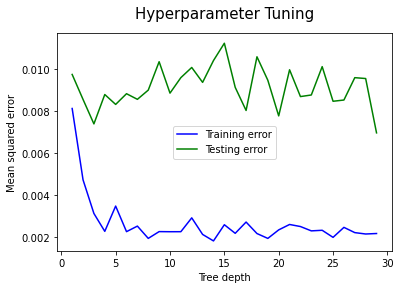

In [59]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 30)
training_error = []
for max_depth in max_depths:
    model_1 =  RandomForestRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 =  RandomForestRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [60]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(10, 100, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 26, 'min_samples_split': 10}
0.023933944300172403


In [61]:
forest_model2 = RandomForestRegressor(n_jobs = 1, random_state=27, max_depth = 26, min_samples_split = 10)
forest_model2.fit(X_train,y_train)

#gathering the predictions
forest_preds2 = forest_model2.predict(X_test)


print(metrics.r2_score(y_test, forest_preds2))
print(metrics.mean_squared_log_error(y_test, forest_preds2))

0.12228893780693817
0.00557379689734332


In [62]:
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(y_test, forest_preds2), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(y_test, forest_preds2), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(y_test, forest_preds2), 2))

MSE for DTReg (All features):  0.01
MAE for DTReg (All features):  0.06
RSquared for DTReg (All features):  0.12


In [67]:
# Split dataset into y targets and remove the targets from the dataset.  
cols = df3.columns
target = 'PCT_POPEXPHOMELESS'
feat = [c for c in cols if c != target]

train_data = df3[feat].values
train_targets = df3[target].values

In [70]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
X_train, X_test, y_train, y_test = train_test_split(train_data, train_targets, test_size=0.3, shuffle = True)

In [71]:
print(X_train.shape)
print(X_test.shape)

(35, 31)
(16, 31)


In [72]:
print(train_data.shape)
print(train_data)

(51, 31)
[[ 36.  17.  35. ...  50. 158. 138.]
 [ 47.  49.  47. ...  32.  15. 160.]
 [ 39.  30.  43. ...  46. 623. 197.]
 ...
 [ 35.  18.  42. ...  11.  70.  26.]
 [ 20.  13.  26. ...  53. 260. 137.]
 [ 46.  43.  49. ...  28.  19.  70.]]


In [73]:
 # Normalize the data by subratcing the mean from each feature and divide by one standard deviation
mean = X_train.mean(axis = 0)
std = X_train.std(axis =0)
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [74]:
print(train_data)

[[ 36.  17.  35. ...  50. 158. 138.]
 [ 47.  49.  47. ...  32.  15. 160.]
 [ 39.  30.  43. ...  46. 623. 197.]
 ...
 [ 35.  18.  42. ...  11.  70.  26.]
 [ 20.  13.  26. ...  53. 260. 137.]
 [ 46.  43.  49. ...  28.  19.  70.]]


In [75]:
print(X_train)

[[-1.82218649 -1.82673056 -1.35747102 ... -0.56108423 -0.55644084
  -0.41031428]
 [ 0.50692406 -0.74192768  0.48351054 ... -0.23577311 -0.39128834
  -0.32727811]
 [-1.47967024 -1.6911302  -0.72020817 ... -0.59361535 -0.50797218
  -0.41670168]
 ...
 [ 0.43842081 -0.6741275   0.97915943 ... -0.65867757 -0.5492603
  -0.56574097]
 [-1.34266373 -1.75893038 -0.29536627 ... -0.60445905 -0.35538562
  -0.52102918]
 [ 1.26045983  1.42767807  1.33319434 ... -0.43095979 -0.64799278
  -0.28043719]]


In [84]:
# Built a sequential neural network model.  Start with backend.clear_session()
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [85]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [86]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
history = model.fit(X_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_split = 0.3,
                    verbose = 0)

In [87]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

             loss           mae  val_loss  val_mae
995  1.987415e-15  3.337239e-08  0.050054  0.16674
996  4.663515e-15  5.417193e-08  0.050054  0.16674
997  6.051294e-15  6.224339e-08  0.050054  0.16674
998  2.894097e-15  4.330650e-08  0.050054  0.16674
999  2.019796e-15  3.709768e-08  0.050054  0.16674


In [88]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

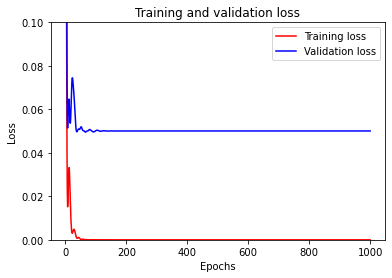

In [89]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,0.1)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

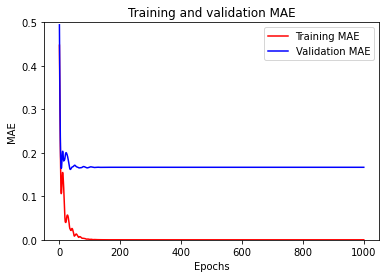

In [90]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,0.5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [91]:
# Evaluate the model on the test data and print the results
results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

1/1 [==============================] - 0s 13ms/step - loss: 0.1412 - mae: 0.2228
[0.1412433534860611, 0.2227756232023239]
['loss', 'mae']


In [94]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
X_train, X_test, y_train, y_test = train_test_split(train_data, train_targets, test_size=0.2, shuffle = True)

In [95]:
print(X_train.shape)
print(X_test.shape)

(40, 31)
(11, 31)


In [96]:
print(train_data.shape)
print(train_data)

(51, 31)
[[ 36.  17.  35. ...  50. 158. 138.]
 [ 47.  49.  47. ...  32.  15. 160.]
 [ 39.  30.  43. ...  46. 623. 197.]
 ...
 [ 35.  18.  42. ...  11.  70.  26.]
 [ 20.  13.  26. ...  53. 260. 137.]
 [ 46.  43.  49. ...  28.  19.  70.]]


In [97]:
 # Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = X_train.mean(axis = 0)
std = X_train.std(axis =0)
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [99]:
print(X_train)

[[-1.07756088 -1.51061624 -0.76116611 ...  0.35870444  0.09742018
   1.02916222]
 [-0.25656211 -0.58756049  0.11257865 ... -0.54228002 -0.60611761
  -0.53446342]
 [ 0.76968634  1.32955531  0.24700092 ... -0.21567315 -0.03461104
  -0.23583996]
 ...
 [ 0.42760352  0.54850813 -0.22347702 ... -0.46344388 -0.53255735
  -0.53653719]
 [ 0.49602009  0.761521    0.31421206 ...  1.56377115  0.20115899
   1.25727737]
 [ 1.45385198  0.69051671  1.45680135 ... -0.53101771 -0.7155149
  -0.51372568]]


In [100]:
print(train_data)

[[ 36.  17.  35. ...  50. 158. 138.]
 [ 47.  49.  47. ...  32.  15. 160.]
 [ 39.  30.  43. ...  46. 623. 197.]
 ...
 [ 35.  18.  42. ...  11.  70.  26.]
 [ 20.  13.  26. ...  53. 260. 137.]
 [ 46.  43.  49. ...  28.  19.  70.]]


In [107]:
# Built a sequential neural network model.  Start with backend.clear_session()
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [108]:
# Compile the model.  Use 'adam' optimizer. Using 'mse' for loss function and using 'mae' for metrics for a regression problem
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [109]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
history = model.fit(X_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose = 0)

In [110]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

             loss           mae  val_loss   val_mae
995  1.273287e-15  3.026798e-08  0.053862  0.160548
996  1.887379e-15  3.259629e-08  0.053862  0.160548
997  2.329734e-15  3.282912e-08  0.053862  0.160548
998  2.057382e-15  3.306195e-08  0.053862  0.160548
999  2.779027e-15  3.911555e-08  0.053862  0.160548


In [111]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

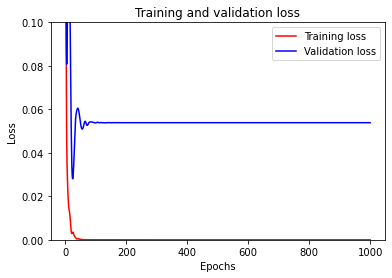

In [112]:
# Plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,0.1)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

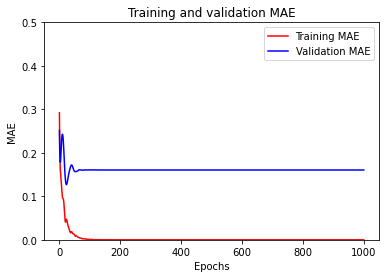

In [114]:
# Plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,0.5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [115]:
# Evaluate the model on the test data and print the results
results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

1/1 [==============================] - 0s 17ms/step - loss: 0.0707 - mae: 0.1822
[0.07067832350730896, 0.18218864500522614]
['loss', 'mae']


In [116]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64, activation = 'tanh'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

history = model.fit(X_train,
                   y_train,
                   epochs = 1000,
                   batch_size=100,
                   validation_split = 0.2,
                   verbose = 0)

results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

1/1 [==============================] - 0s 13ms/step - loss: 0.0484 - mae: 0.1476
[0.0484296940267086, 0.14762067794799805]
['loss', 'mae']


In [122]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'sigmoid', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dense(1))

model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

history = model.fit(X_train,
                   y_train,
                   epochs = 1000,
                   batch_size=100,
                   validation_split = 0.2,
                   verbose = 0)

results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

1/1 [==============================] - 0s 13ms/step - loss: 0.0112 - mae: 0.0747
[0.01121061947196722, 0.07473304122686386]
['loss', 'mae']


In [123]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

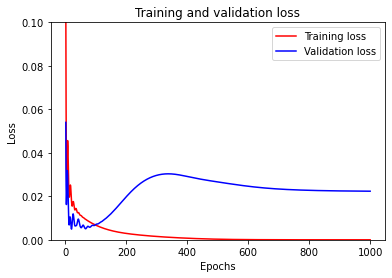

In [124]:
# Plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,0.1)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

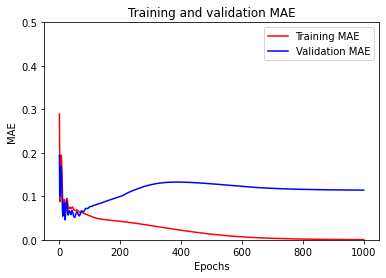

In [125]:
#Plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,0.5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [126]:
df2.to_excel("C:\\Users\\ashle\\MSDS696\\Data Visual.xlsx")